In [ ]:
# STEP 1: Install HuggingFace datasets
!pip install datasets

# STEP 2: Import libraries
from datasets import load_dataset
import pandas as pd

print("📥 Loading 'yelp_review_full' dataset...")
dataset = load_dataset("yelp_review_full", split="train[:50000]")  # Adjust size if needed

# STEP 3: Define Apple & Samsung keywords
apple_keywords = [
    "apple", "iphone", "ipad", "macbook", "mac", "airpods", "apple watch", "ios"
]
samsung_keywords = [
    "samsung", "galaxy", "note", "s22", "s21", "tab", "buds", "samsung watch", "android"
]
product_keywords = [
    "smartphone", "tablet", "laptop", "phone", "headphones", "wearable"
]

all_keywords = set(apple_keywords + samsung_keywords + product_keywords)
all_keywords = [k.lower() for k in all_keywords]

# STEP 4: Filter for relevant reviews
def is_tech_related(example):
    text = example["text"].lower()
    return any(keyword in text for keyword in all_keywords)

filtered = dataset.filter(is_tech_related)

# STEP 5: Tag each review with brand
def tag_brand(example):
    text = example["text"].lower()
    if any(word in text for word in apple_keywords):
        return "apple"
    elif any(word in text for word in samsung_keywords):
        return "samsung"
    else:
        return "general"

filtered = filtered.map(lambda x: {"brand": tag_brand(x)})

# STEP 6: Convert to DataFrame
df = pd.DataFrame(filtered)

# STEP 7: Map star ratings (0–4) to sentiment
# In yelp_review_full: 0=1 star, 1=2 stars, ..., 4=5 stars
def map_star_to_sentiment(label):
    if label in [0, 1]:
        return -1
    elif label == 2:
        return 0
    elif label in [3, 4]:
        return 1

df["sentiment"] = df["label"].apply(map_star_to_sentiment)

# Optional: Keep only relevant columns
df = df[["text", "label", "brand", "sentiment"]]
df = df.rename(columns={"text": "review_text", "label": "star_rating"})

# STEP 8: Save to CSV
df.to_csv("apple_samsung_yelp_sentiment.csv", index=False)
print(f"\n✅ Final dataset shape: {df.shape}")
print("💾 Saved as 'apple_samsung_yelp_sentiment.csv'")
print("\n📊 Sentiment distribution:")
print(df["sentiment"].value_counts())
print("\n📌 Brand distribution:")
print(df["brand"].value_counts())


📥 Loading 'yelp_review_full' dataset...


README.md:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/299M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/12559 [00:00<?, ? examples/s]


✅ Final dataset shape: (12559, 4)
💾 Saved as 'apple_samsung_yelp_sentiment.csv'

📊 Sentiment distribution:
sentiment
-1    6171
 1    3835
 0    2553
Name: count, dtype: int64

📌 Brand distribution:
brand
samsung    8191
apple      3150
general    1218
Name: count, dtype: int64


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
df = pd.read_csv("apple_samsung_yelp_sentiment.csv", engine="python")



🧭 Sentiment Class Distribution:
sentiment
-1.0    2704
 1.0    1691
 0.0    1174
Name: count, dtype: int64


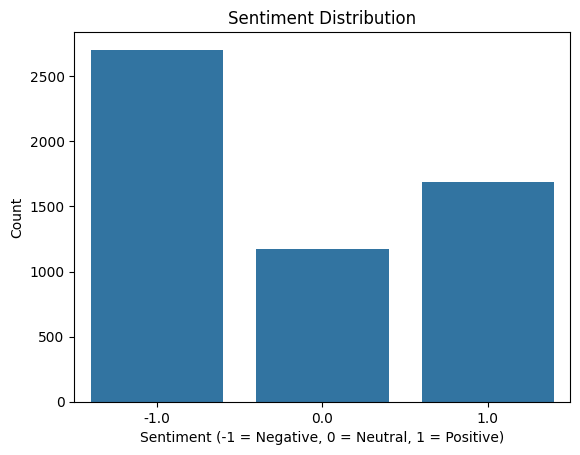


📌 Brand Distribution:
brand
samsung    3694
apple      1357
general     518
sam           1
Name: count, dtype: int64


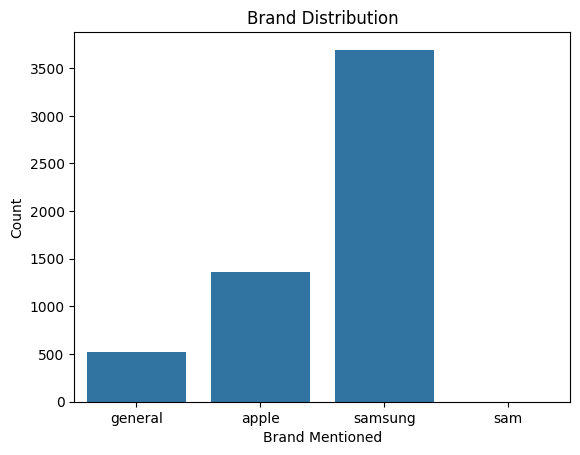

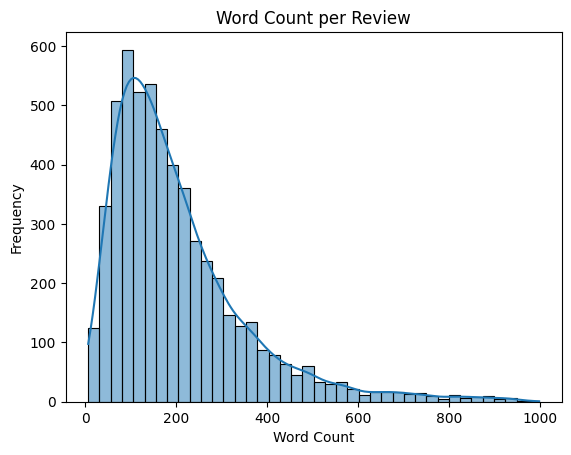

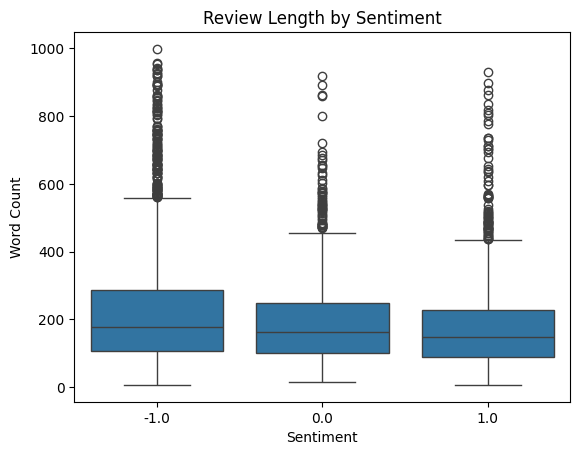


📝 Average words per review by sentiment:
sentiment
-1.0    223.492973
 0.0    194.685690
 1.0    177.657008
Name: word_count, dtype: float64

🔍 Example (Negative):
Brand: general
Review: Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have office workers, you have patients with medical needs, why isn't anyone answering the phone?  It's incomprehensible and not work the aggravation.  It's with regret that I feel that I have to give Dr. Goldberg 2 stars.

🔍 Example (Neutral):
Brand: samsung
Review: OK, what is with all of these \"CASH ONLY\" places in Pittsburgh? I can appreciate that some smaller businesses might have 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("apple_samsung_yelp_sentiment.csv")

# Word count per review
df["word_count"] = df["review_text"].apply(lambda x: len(str(x).split()))

# 1. Sentiment Distribution
print("\n🧭 Sentiment Class Distribution:")
print(df["sentiment"].value_counts())

sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment (-1 = Negative, 0 = Neutral, 1 = Positive)")
plt.ylabel("Count")
plt.show()

# 2. Brand Distribution
print("\n📌 Brand Distribution:")
print(df["brand"].value_counts())

sns.countplot(x="brand", data=df)
plt.title("Brand Distribution")
plt.xlabel("Brand Mentioned")
plt.ylabel("Count")
plt.show()

# 3. Word count analysis
sns.histplot(data=df, x="word_count", bins=40, kde=True)
plt.title("Word Count per Review")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# 4. Word count by sentiment
sns.boxplot(x="sentiment", y="word_count", data=df)
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.show()

# 5. Average words per sentiment
print("\n📝 Average words per review by sentiment:")
print(df.groupby("sentiment")["word_count"].mean())

# 6. Example reviews per sentiment class
for sentiment in [-1, 0, 1]:
    sample = df[df["sentiment"] == sentiment].iloc[0]
    print(f"\n🔍 Example ({'Negative' if sentiment == -1 else 'Neutral' if sentiment == 0 else 'Positive'}):")
    print(f"Brand: {sample['brand']}")
    print("Review:", sample['review_text'])


In [ ]:
import csv
df = pd.read_csv("apple_samsung_yelp_sentiment.csv", quoting=csv.QUOTE_NONE, engine="python")


ParserError: Expected 8 fields in line 3, saw 9

In [ ]:
import pandas as pd
df = pd.read_csv("apple_samsung_yelp_sentiment.csv", on_bad_lines='skip', engine="python")
print(df.columns)
print(df.head(3))


Index(['review_text', 'star_rating', 'brand', 'sentiment'], dtype='object')
                                         review_text  star_rating    brand  \
0  Unfortunately, the frustration of being Dr. Go...            1  general   
1  I don't know what Dr. Goldberg was like before...            0    apple   
2  Owning a driving range inside the city limits ...            0    apple   

   sentiment  
0         -1  
1         -1  
2         -1  


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()                             # lowercase
    text = re.sub(r'[^a-z\s]', ' ', text)                # remove non-letters
    text = re.sub(r'\s+', ' ', text).strip()             # remove extra whitespace
    words = text.split()
    words = [w for w in words if w not in stop_words]    # remove stop words
    return " ".join(words)

df['cleaned_text'] = df['review_text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install -q datasets


In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.optim import AdamW

In [ ]:
# 📦 All-in-One Cell: DistilBERT Fine-Tuning on Apple/Samsung Yelp Sentiment Dataset

import pandas as pd, re, nltk, torch
from datasets import Dataset
# from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tqdm import tqdm

nltk.download('stopwords')
from nltk.corpus import stopwords

# ⚙️ Device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# 🚀 Load and clean dataset
df = pd.read_csv("/content/apple_samsung_yelp_sentiment.csv")  # <-- adjust path if needed
df = df.rename(columns={"review_text": "text", "sentiment": "label"})

stop_words = set(stopwords.words("english"))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return " ".join([w for w in text.split() if w not in stop_words])

df["cleaned"] = df["text"].apply(clean_text)
df["label"] = df["label"].map({-1: 0, 0: 1, 1: 2})

# ✂️ Split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["label"])
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42, stratify=train_df["label"])

# 🤗 Hugging Face Dataset
def to_dataset(d): return Dataset.from_pandas(d[["cleaned", "label"]], preserve_index=False)
train_ds, val_ds, test_ds = map(to_dataset, [train_df, val_df, test_df])

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
def tokenize_fn(ex): return tokenizer(ex["cleaned"], padding="max_length", truncation=True, max_length=128)
train_ds = train_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
val_ds   = val_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
test_ds  = test_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")

# 🔧 Model & DataLoader
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3).to(device)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16)
test_loader  = DataLoader(test_ds, batch_size=16)
optimizer = AdamW(model.parameters(), lr=2e-5)

# 🎯 Train loop
for epoch in range(12):
    print(f"\nEpoch {epoch+1}")
    model.train()
    loop = tqdm(train_loader)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        out = model(**batch)
        out.loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        optimizer.zero_grad()
        loop.set_postfix(loss=out.loss.item())

# 📊 Eval function
def evaluate(loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for b in loader:
            b = {k: v.to(device) for k, v in b.items()}
            o = model(**b)
            pred = torch.argmax(o.logits, dim=-1)
            preds += pred.cpu().tolist()
            labels += b["labels"].cpu().tolist()
    p, r, f, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": p, "recall": r, "f1": f}

# ✅ Run evaluation
print("\nValidation:", evaluate(val_loader))
print("Test:", evaluate(test_loader))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Device: cuda


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/9042 [00:00<?, ? examples/s]

Map:   0%|          | 0/1005 [00:00<?, ? examples/s]

Map:   0%|          | 0/2512 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1


100%|██████████| 566/566 [01:46<00:00,  5.33it/s, loss=0.476]



Epoch 2


100%|██████████| 566/566 [01:44<00:00,  5.40it/s, loss=1.3]



Epoch 3


100%|██████████| 566/566 [01:44<00:00,  5.41it/s, loss=0.806]



Epoch 4


100%|██████████| 566/566 [01:44<00:00,  5.41it/s, loss=0.114]



Epoch 5


100%|██████████| 566/566 [01:44<00:00,  5.40it/s, loss=0.366]



Epoch 6


100%|██████████| 566/566 [01:45<00:00,  5.39it/s, loss=0.00595]



Epoch 7


100%|██████████| 566/566 [01:45<00:00,  5.38it/s, loss=0.00203]



Epoch 8


100%|██████████| 566/566 [01:44<00:00,  5.40it/s, loss=0.00119]



Epoch 9


100%|██████████| 566/566 [01:44<00:00,  5.40it/s, loss=0.00708]



Epoch 10


100%|██████████| 566/566 [01:44<00:00,  5.39it/s, loss=0.00171]



Epoch 11


100%|██████████| 566/566 [01:44<00:00,  5.39it/s, loss=0.000846]



Epoch 12


100%|██████████| 566/566 [01:44<00:00,  5.41it/s, loss=0.000412]



Validation: {'accuracy': 0.7174129353233831, 'precision': 0.7183719843934986, 'recall': 0.7174129353233831, 'f1': 0.7176456397091261}
Test: {'accuracy': 0.7153662420382165, 'precision': 0.730757283903042, 'recall': 0.7153662420382165, 'f1': 0.7209264839608907}


In [ ]:
# RoBERTa Fine-Tuning: Apple/Samsung Yelp Dataset

import pandas as pd
from datasets import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.optim import AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# Debugging Mode
%env CUDA_LAUNCH_BLOCKING=1

# CUDA Check
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device name:", torch.cuda.get_device_name(0))
else:
    print("Using CPU")

# Load Yelp Dataset
df = pd.read_csv("/content/apple_samsung_yelp_sentiment.csv")
df = df.rename(columns={"review_text": "text", "sentiment": "label"})

# Clean text
stop_words = set(stopwords.words("english"))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return " ".join([w for w in text.split() if w not in stop_words])

df["cleaned"] = df["text"].apply(clean_text)
df["label"] = df["label"].map({-1: 0, 0: 1, 1: 2})

# Split into train/val/test
train_data, test_data = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, stratify=train_data["label"], random_state=42)

# Convert to Hugging Face datasets
def prepare_hf_dataset(data):
    return Dataset.from_pandas(data[["cleaned", "label"]], preserve_index=False)

train_dataset = prepare_hf_dataset(train_data)
val_dataset = prepare_hf_dataset(val_data)
test_dataset = prepare_hf_dataset(test_data)

# Tokenizer and tokenization
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize_function(example):
    return tokenizer(example["cleaned"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Prepare for PyTorch
train_dataset = train_dataset.rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
val_dataset = val_dataset.rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
test_dataset = test_dataset.rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3).to(device)

# Dataloaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training Loop
num_epochs = 8
model.train()

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}")
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        optimizer.zero_grad()
        loop.set_description(f"Epoch {epoch}")
        loop.set_postfix(loss=loss.item())

# Evaluation
model.eval()

def evaluate(loader):
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_labels.extend(batch["labels"].cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="weighted")
    accuracy = accuracy_score(all_labels, all_preds)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

val_results = evaluate(val_loader)
test_results = evaluate(test_loader)

print("Validation Results:", val_results)
print("Test Results:", test_results)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


env: CUDA_LAUNCH_BLOCKING=1
CUDA available: True
Device name: Tesla T4


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/9042 [00:00<?, ? examples/s]

Map:   0%|          | 0/1005 [00:00<?, ? examples/s]

Map:   0%|          | 0/2512 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1


Epoch 0: 100%|██████████| 566/566 [03:32<00:00,  2.66it/s, loss=0.0971]


Epoch 2


Epoch 1: 100%|██████████| 566/566 [03:31<00:00,  2.68it/s, loss=1.31]


Epoch 3


Epoch 2: 100%|██████████| 566/566 [03:31<00:00,  2.67it/s, loss=0.00978]


Epoch 4


Epoch 3: 100%|██████████| 566/566 [03:31<00:00,  2.67it/s, loss=0.0414]


Epoch 5


Epoch 4: 100%|██████████| 566/566 [03:31<00:00,  2.67it/s, loss=0.224]


Epoch 6


Epoch 5: 100%|██████████| 566/566 [03:31<00:00,  2.68it/s, loss=0.00778]


Epoch 7


Epoch 6: 100%|██████████| 566/566 [03:31<00:00,  2.68it/s, loss=2.85]


Epoch 8


Epoch 7: 100%|██████████| 566/566 [03:31<00:00,  2.67it/s, loss=0.00716]


Validation Results: {'accuracy': 0.727363184079602, 'precision': 0.738492953594758, 'recall': 0.727363184079602, 'f1': 0.7314656760123917}
Test Results: {'accuracy': 0.7503980891719745, 'precision': 0.765173001059298, 'recall': 0.7503980891719745, 'f1': 0.756605194764293}


In [ ]:
# XLNet Fine-Tuning: Apple/Samsung Yelp Dataset

import pandas as pd
from datasets import Dataset
from transformers import XLNetTokenizer, XLNetForSequenceClassification
from torch.optim import AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# CUDA Check
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device name:", torch.cuda.get_device_name(0))
else:
    print("Using CPU")

# Load and clean dataset
df = pd.read_csv("/content/apple_samsung_yelp_sentiment.csv")
df = df.rename(columns={"review_text": "text", "sentiment": "label"})

stop_words = set(stopwords.words("english"))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return " ".join([w for w in text.split() if w not in stop_words])

df["cleaned"] = df["text"].apply(clean_text)
df["label"] = df["label"].map({-1: 0, 0: 1, 1: 2})

# Split
train_data, test_data = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, stratify=train_data["label"], random_state=42)

# Convert to HF datasets
def prepare_hf_dataset(data):
    return Dataset.from_pandas(data[["cleaned", "label"]], preserve_index=False)

train_dataset = prepare_hf_dataset(train_data)
val_dataset = prepare_hf_dataset(val_data)
test_dataset = prepare_hf_dataset(test_data)

# Tokenization
tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")
def tokenize_function(example):
    return tokenizer(example["cleaned"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
val_dataset = val_dataset.map(tokenize_function, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
test_dataset = test_dataset.map(tokenize_function, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=3).to(device)

# Dataloaders and optimizer
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
model.train()
for epoch in range(4):
    print(f"Epoch {epoch + 1}")
    loop = tqdm(train_loader)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        optimizer.zero_grad()
        loop.set_postfix(loss=loss.item())

# Evaluation
model.eval()
def evaluate(loader):
    all_labels, all_preds = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_labels.extend(batch["labels"].cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
    p, r, f, _ = precision_recall_fscore_support(all_labels, all_preds, average="weighted")
    acc = accuracy_score(all_labels, all_preds)
    return {"accuracy": acc, "precision": p, "recall": r, "f1": f1}

print("Validation Results:", evaluate(val_loader))
print("Test Results:", evaluate(test_loader))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CUDA available: True
Device name: Tesla T4


Map:   0%|          | 0/9042 [00:00<?, ? examples/s]

Map:   0%|          | 0/1005 [00:00<?, ? examples/s]

Map:   0%|          | 0/2512 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1


  0%|          | 0/566 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

100%|██████████| 566/566 [04:40<00:00,  2.02it/s, loss=0.392]


Epoch 2


100%|██████████| 566/566 [04:38<00:00,  2.03it/s, loss=0.707]


Epoch 3


100%|██████████| 566/566 [04:38<00:00,  2.03it/s, loss=0.349]


Epoch 4


100%|██████████| 566/566 [04:38<00:00,  2.03it/s, loss=0.184]


NameError: name 'f1' is not defined

In [ ]:
# DeBERTaV3 Fine-Tuning: Apple/Samsung Yelp Dataset

import pandas as pd
from datasets import Dataset
from transformers import DebertaV2Tokenizer, DebertaV2ForSequenceClassification
from torch.optim import AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# CUDA Check
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device name:", torch.cuda.get_device_name(0))
else:
    print("Using CPU")

# Load and clean dataset
df = pd.read_csv("/content/apple_samsung_yelp_sentiment.csv")
df = df.rename(columns={"review_text": "text", "sentiment": "label"})

stop_words = set(stopwords.words("english"))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return " ".join([w for w in text.split() if w not in stop_words])

df["cleaned"] = df["text"].apply(clean_text)
df["label"] = df["label"].map({-1: 0, 0: 1, 1: 2})

# Split
train_data, test_data = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, stratify=train_data["label"], random_state=42)

# Convert to HF datasets
def prepare_hf_dataset(data):
    return Dataset.from_pandas(data[["cleaned", "label"]], preserve_index=False)

train_dataset = prepare_hf_dataset(train_data)
val_dataset = prepare_hf_dataset(val_data)
test_dataset = prepare_hf_dataset(test_data)

# Tokenizer
tokenizer = DebertaV2Tokenizer.from_pretrained("microsoft/deberta-v3-small")
def tokenize_function(example):
    return tokenizer(example["cleaned"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
val_dataset = val_dataset.map(tokenize_function, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
test_dataset = test_dataset.map(tokenize_function, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")

# Model setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DebertaV2ForSequenceClassification.from_pretrained("microsoft/deberta-v3-small", num_labels=3).to(device)

# Dataloaders and optimizer
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
model.train()
for epoch in range(8):  # more epochs since it's a smaller DeBERTa
    print(f"Epoch {epoch + 1}")
    loop = tqdm(train_loader)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        optimizer.zero_grad()
        loop.set_postfix(loss=loss.item())

# Evaluation
model.eval()
def evaluate(loader):
    all_labels, all_preds = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_labels.extend(batch["labels"].cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
    p, r, f, _ = precision_recall_fscore_support(all_labels, all_preds, average="weighted")
    acc = accuracy_score(all_labels, all_preds)
    return {"accuracy": acc, "precision": p, "recall": r, "f1": f}

print("Validation Results:", evaluate(val_loader))
print("Test Results:", evaluate(test_loader))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CUDA available: True
Device name: Tesla T4


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

Map:   0%|          | 0/9042 [00:00<?, ? examples/s]

Map:   0%|          | 0/1005 [00:00<?, ? examples/s]

Map:   0%|          | 0/2512 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/286M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/286M [00:00<?, ?B/s]

Epoch 1



100%|██████████| 566/566 [02:35<00:00,  3.64it/s, loss=0.741]


Epoch 2


100%|██████████| 566/566 [02:30<00:00,  3.75it/s, loss=0.0238]


Epoch 3


100%|██████████| 566/566 [02:30<00:00,  3.75it/s, loss=0.0279]


Epoch 4


100%|██████████| 566/566 [02:30<00:00,  3.75it/s, loss=0.187]


Epoch 5


100%|██████████| 566/566 [02:30<00:00,  3.75it/s, loss=0.24]


Epoch 6


100%|██████████| 566/566 [02:30<00:00,  3.75it/s, loss=0.0276]


Epoch 7


100%|██████████| 566/566 [02:30<00:00,  3.75it/s, loss=0.0268]


Epoch 8


100%|██████████| 566/566 [02:30<00:00,  3.75it/s, loss=0.0129]


Validation Results: {'accuracy': 0.6885572139303483, 'precision': 0.75459749611645, 'recall': 0.6885572139303483, 'f1': 0.7096540049021612}
Test Results: {'accuracy': 0.70421974522293, 'precision': 0.7700749843816003, 'recall': 0.70421974522293, 'f1': 0.7246288448950967}


In [ ]:
# DeBERTaV3 Fine-Tuning: Apple/Samsung Yelp Dataset

import pandas as pd
from datasets import Dataset
from transformers import DebertaV2Tokenizer, DebertaV2ForSequenceClassification
from torch.optim import AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# CUDA Check
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device name:", torch.cuda.get_device_name(0))
else:
    print("Using CPU")

# Load and clean dataset
df = pd.read_csv("/content/apple_samsung_yelp_sentiment.csv")
df = df.rename(columns={"review_text": "text", "sentiment": "label"})

stop_words = set(stopwords.words("english"))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return " ".join([w for w in text.split() if w not in stop_words])

df["cleaned"] = df["text"].apply(clean_text)
df["label"] = df["label"].map({-1: 0, 0: 1, 1: 2})

# Split
train_data, test_data = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, stratify=train_data["label"], random_state=42)

# Convert to HF datasets
def prepare_hf_dataset(data):
    return Dataset.from_pandas(data[["cleaned", "label"]], preserve_index=False)

train_dataset = prepare_hf_dataset(train_data)
val_dataset = prepare_hf_dataset(val_data)
test_dataset = prepare_hf_dataset(test_data)

# Tokenizer
tokenizer = DebertaV2Tokenizer.from_pretrained("microsoft/deberta-v3-small")
def tokenize_function(example):
    return tokenizer(example["cleaned"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
val_dataset = val_dataset.map(tokenize_function, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
test_dataset = test_dataset.map(tokenize_function, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")

# Model setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DebertaV2ForSequenceClassification.from_pretrained("microsoft/deberta-v3-small", num_labels=3).to(device)

# Dataloaders and optimizer
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
model.train()
for epoch in range(8):  # more epochs since it's a smaller DeBERTa
    print(f"Epoch {epoch + 1}")
    loop = tqdm(train_loader)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        optimizer.zero_grad()
        loop.set_postfix(loss=loss.item())

# Evaluation
model.eval()
def evaluate(loader):
    all_labels, all_preds = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_labels.extend(batch["labels"].cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
    p, r, f, _ = precision_recall_fscore_support(all_labels, all_preds, average="weighted")
    acc = accuracy_score(all_labels, all_preds)
    return {"accuracy": acc, "precision": p, "recall": r, "f1": f}

print("Validation Results:", evaluate(val_loader))
print("Test Results:", evaluate(test_loader))


In [ ]:
# DeBERTaV3 Fine-Tuning: Apple/Samsung Yelp Dataset

import pandas as pd
from datasets import Dataset
from transformers import DebertaV2Tokenizer, DebertaV2ForSequenceClassification
from torch.optim import AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# CUDA Check
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device name:", torch.cuda.get_device_name(0))
else:
    print("Using CPU")

# Load and clean dataset
df = pd.read_csv("/content/apple_samsung_yelp_sentiment.csv")
df = df.rename(columns={"review_text": "text", "sentiment": "label"})

stop_words = set(stopwords.words("english"))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return " ".join([w for w in text.split() if w not in stop_words])

df["cleaned"] = df["text"].apply(clean_text)
df["label"] = df["label"].map({-1: 0, 0: 1, 1: 2})

# Split
train_data, test_data = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, stratify=train_data["label"], random_state=42)

# Convert to HF datasets
def prepare_hf_dataset(data):
    return Dataset.from_pandas(data[["cleaned", "label"]], preserve_index=False)

train_dataset = prepare_hf_dataset(train_data)
val_dataset = prepare_hf_dataset(val_data)
test_dataset = prepare_hf_dataset(test_data)

# Tokenizer
tokenizer = DebertaV2Tokenizer.from_pretrained("microsoft/deberta-v3-small")
def tokenize_function(example):
    return tokenizer(example["cleaned"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
val_dataset = val_dataset.map(tokenize_function, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
test_dataset = test_dataset.map(tokenize_function, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")

# Model setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DebertaV2ForSequenceClassification.from_pretrained("microsoft/deberta-v3-small", num_labels=3).to(device)

# Dataloaders and optimizer
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
model.train()
for epoch in range(8):  # more epochs since it's a smaller DeBERTa
    print(f"Epoch {epoch + 1}")
    loop = tqdm(train_loader)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        optimizer.zero_grad()
        loop.set_postfix(loss=loss.item())

# Evaluation
model.eval()
def evaluate(loader):
    all_labels, all_preds = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=-1)
            all_labels.extend(batch["labels"].cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
    p, r, f, _ = precision_recall_fscore_support(all_labels, all_preds, average="weighted")
    acc = accuracy_score(all_labels, all_preds)
    return {"accuracy": acc, "precision": p, "recall": r, "f1": f}

print("Validation Results:", evaluate(val_loader))
print("Test Results:", evaluate(test_loader))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


CUDA available: True
Device name: Tesla T4


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

Map:   0%|          | 0/9042 [00:00<?, ? examples/s]

Map:   0%|          | 0/1005 [00:00<?, ? examples/s]

Map:   0%|          | 0/2512 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/286M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1


  0%|          | 0/566 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/286M [00:00<?, ?B/s]

100%|██████████| 566/566 [02:27<00:00,  3.83it/s, loss=0.593]


Epoch 2


100%|██████████| 566/566 [02:30<00:00,  3.75it/s, loss=0.203]


Epoch 3


100%|██████████| 566/566 [02:30<00:00,  3.75it/s, loss=0.615]


Epoch 4


100%|██████████| 566/566 [02:31<00:00,  3.75it/s, loss=0.0112]


Epoch 5


100%|██████████| 566/566 [02:31<00:00,  3.74it/s, loss=0.0316]


Epoch 6


100%|██████████| 566/566 [02:30<00:00,  3.75it/s, loss=0.00231]


Epoch 7


100%|██████████| 566/566 [02:31<00:00,  3.74it/s, loss=0.00404]


Epoch 8


100%|██████████| 566/566 [02:31<00:00,  3.74it/s, loss=0.0106]


Validation Results: {'accuracy': 0.7412935323383084, 'precision': 0.755457739699724, 'recall': 0.7412935323383084, 'f1': 0.7472113080965775}


In [ ]:
!pip install -q transformers datasets nltk

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [1]:
# 📦 Install dependencies (only needed if running on Colab)
!pip install -q transformers datasets nltk

# 🔧 Imports
import pandas as pd, re, nltk, torch
from datasets import Dataset
from transformers import DebertaV2Tokenizer, DebertaV2ForSequenceClassification
from torch.utils.data import DataLoader
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tqdm import tqdm
nltk.download("stopwords")
from nltk.corpus import stopwords

# ⚙️ Device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# 📂 Load your dataset
df = pd.read_csv("/content/apple_samsung_yelp_sentiment.csv", quotechar='"', engine="python", on_bad_lines='skip')
df = df.rename(columns={"review_text": "text", "sentiment": "label"})

# ✨ Clean text
stop_words = set(stopwords.words("english"))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return " ".join([w for w in text.split() if w not in stop_words])

df["cleaned"] = df["text"].apply(clean_text)
df["label"] = df["label"].map({-1: 0, 0: 1, 1: 2})

# 🔀 Split data
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, stratify=train_df["label"], random_state=42)

# 🤗 Convert to HuggingFace Datasets
def to_dataset(d): return Dataset.from_pandas(d[["cleaned", "label"]], preserve_index=False)
train_ds, val_ds, test_ds = map(to_dataset, [train_df, val_df, test_df])

# 🧠 Tokenize
tokenizer = DebertaV2Tokenizer.from_pretrained("microsoft/deberta-v3-base")
def tokenize_fn(ex): return tokenizer(ex["cleaned"], padding="max_length", truncation=True, max_length=128)

train_ds = train_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
val_ds   = val_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
test_ds  = test_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")

# 📊 Model & Dataloaders
model = DebertaV2ForSequenceClassification.from_pretrained("microsoft/deberta-v3-base", num_labels=3).to(device)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16)
test_loader  = DataLoader(test_ds, batch_size=16)

# 🔧 Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# 🎯 Train
for epoch in range(8):
    print(f"\nEpoch {epoch + 1}")
    model.train()
    loop = tqdm(train_loader)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        optimizer.zero_grad()
        loop.set_postfix(loss=loss.item())

# 📈 Evaluate
def evaluate(loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            out = model(**batch)
            pred = torch.argmax(out.logits, dim=-1)
            preds += pred.cpu().tolist()
            labels += batch["labels"].cpu().tolist()
    p, r, f, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": p, "recall": r, "f1": f}

print("\nValidation:", evaluate(val_loader))
print("Test:", evaluate(test_loader))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

Map:   0%|          | 0/9042 [00:00<?, ? examples/s]

Map:   0%|          | 0/1005 [00:00<?, ? examples/s]

Map:   0%|          | 0/2512 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1



100%|██████████| 566/566 [04:32<00:00,  2.07it/s, loss=0.131]



Epoch 2


100%|██████████| 566/566 [04:32<00:00,  2.08it/s, loss=0.561]



Epoch 3


100%|██████████| 566/566 [04:32<00:00,  2.08it/s, loss=0.0178]



Epoch 4


100%|██████████| 566/566 [04:32<00:00,  2.08it/s, loss=2.23]



Epoch 5


100%|██████████| 566/566 [04:32<00:00,  2.08it/s, loss=0.011]



Epoch 6


100%|██████████| 566/566 [04:32<00:00,  2.08it/s, loss=3.01]



Epoch 7


100%|██████████| 566/566 [04:32<00:00,  2.08it/s, loss=0.28]



Epoch 8


100%|██████████| 566/566 [04:32<00:00,  2.08it/s, loss=0.00815]



Validation: {'accuracy': 0.7532338308457711, 'precision': 0.7572237429541271, 'recall': 0.7532338308457711, 'f1': 0.751809190038524}
Test: {'accuracy': 0.7452229299363057, 'precision': 0.7546749292638254, 'recall': 0.7452229299363057, 'f1': 0.7436910163360136}


In [1]:
!pip install -q transformers datasets nltk scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12=

In [3]:
import pandas as pd, re, nltk, torch
from datasets import Dataset
from transformers import DebertaV2Tokenizer, DebertaV2ForSequenceClassification, get_scheduler
from torch.utils.data import DataLoader
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tqdm import tqdm
from nltk.corpus import stopwords
import numpy as np

# 📥 Download NLTK Stopwords
nltk.download('stopwords')

# ⚙️ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# 📂 Load and clean dataset
df = pd.read_csv("/content/apple_samsung_yelp_sentiment.csv", quotechar='"', engine="python", on_bad_lines='skip')
df = df.rename(columns={"review_text": "text", "sentiment": "label"})

stop_words = set(stopwords.words("english"))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return " ".join([w for w in text.split() if w not in stop_words])

df["cleaned"] = df["text"].apply(clean_text)
df["label"] = df["label"].map({-1: 0, 0: 1, 1: 2})

# 🧪 Train/Val/Test split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, stratify=train_df["label"], random_state=42)

# 🤗 Convert to Hugging Face Datasets
def to_dataset(d): return Dataset.from_pandas(d[["cleaned", "label"]], preserve_index=False)
train_ds, val_ds, test_ds = map(to_dataset, [train_df, val_df, test_df])

# 🧠 Tokenization
tokenizer = DebertaV2Tokenizer.from_pretrained("microsoft/deberta-v3-base")
def tokenize_fn(ex): return tokenizer(ex["cleaned"], padding="max_length", truncation=True, max_length=128)

train_ds = train_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
val_ds   = val_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
test_ds  = test_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")

# 🔢 Dataloaders
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16)
test_loader  = DataLoader(test_ds, batch_size=16)

# 📊 Class Weights (to handle imbalance)
class_counts = train_df["label"].value_counts().sort_index().values
class_weights = torch.tensor(1.0 / class_counts, dtype=torch.float).to(device)
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

# 🧱 Model
model = DebertaV2ForSequenceClassification.from_pretrained(
    "microsoft/deberta-v3-base", num_labels=3
).to(device)

# 🎯 Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_training_steps = len(train_loader) * 10  # for 10 epochs
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# 🛑 Early stopping setup
best_val_f1 = 0
patience = 2
patience_counter = 0

# 🚂 Training loop
for epoch in range(10):
    print(f"\nEpoch {epoch + 1}")
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = loss_fn(outputs.logits, batch["labels"])
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        total_loss += loss.item()
    print("Train loss:", total_loss / len(train_loader))

    # 📈 Validation
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for b in val_loader:
            b = {k: v.to(device) for k, v in b.items()}
            out = model(**b)
            pred = torch.argmax(out.logits, dim=-1)
            preds += pred.cpu().tolist()
            labels += b["labels"].cpu().tolist()

    p, r, f, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    print("Validation F1:", f)

    # Early stopping
    if f > best_val_f1:
        best_val_f1 = f
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

# 📊 Evaluation
def evaluate(loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for b in loader:
            b = {k: v.to(device) for k, v in b.items()}
            o = model(**b)
            pred = torch.argmax(o.logits, dim=-1)
            preds += pred.cpu().tolist()
            labels += b["labels"].cpu().tolist()
    p, r, f, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": p, "recall": r, "f1": f}

# Load best model
model.load_state_dict(torch.load("best_model.pt"))

print("\n✅ Final Validation:", evaluate(val_loader))
print("✅ Final Test:", evaluate(test_loader))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

Map:   0%|          | 0/9042 [00:00<?, ? examples/s]

Map:   0%|          | 0/1005 [00:00<?, ? examples/s]

Map:   0%|          | 0/2512 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]


Epoch 1



100%|██████████| 566/566 [04:17<00:00,  2.20it/s]


Train loss: 0.7544760812245073
Validation F1: 0.7252518073413595

Epoch 2


100%|██████████| 566/566 [04:20<00:00,  2.17it/s]


Train loss: 0.5691870914462809
Validation F1: 0.7808433965376683

Epoch 3


100%|██████████| 566/566 [04:20<00:00,  2.18it/s]


Train loss: 0.44737648106979816
Validation F1: 0.7831666113122704

Epoch 4


100%|██████████| 566/566 [04:20<00:00,  2.17it/s]


Train loss: 0.3328586884876285
Validation F1: 0.7769109309668432

Epoch 5


100%|██████████| 566/566 [04:19<00:00,  2.18it/s]


Train loss: 0.24033034006100767
Validation F1: 0.7782751395139056
Early stopping triggered!

✅ Final Validation: {'accuracy': 0.7810945273631841, 'precision': 0.7861305053160718, 'recall': 0.7810945273631841, 'f1': 0.7831666113122704}
✅ Final Test: {'accuracy': 0.7726910828025477, 'precision': 0.7799084005874735, 'recall': 0.7726910828025477, 'f1': 0.77597675851106}


In [1]:
# 🚀 Install required packages
!pip install -q transformers datasets nltk scikit-learn nlpaug

# 📚 Imports
import pandas as pd, re, nltk, torch
from datasets import Dataset
from transformers import DebertaV2Tokenizer, DebertaV2ForSequenceClassification, AdamW, get_scheduler
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tqdm import tqdm
import nlpaug.augmenter.word as naw
import torch.nn as nn
nltk.download('stopwords')
from nltk.corpus import stopwords

# ⚙️ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# 📂 Load and clean dataset
df = pd.read_csv("/content/apple_samsung_yelp_sentiment.csv")  # Upload this file to Colab
df = df.rename(columns={"review_text": "text", "sentiment": "label"})

stop_words = set(stopwords.words("english"))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\\s]", " ", text)
    text = re.sub(r"\\s+", " ", text).strip()
    return " ".join([w for w in text.split() if w not in stop_words])

df["cleaned"] = df["text"].apply(clean_text)
df["label"] = df["label"].map({-1: 0, 0: 1, 1: 2})

# 🔁 Data augmentation (30% of dataset)
aug = naw.SynonymAug(aug_src='wordnet')
augmented = df.sample(frac=0.3, random_state=42).copy()
augmented["cleaned"] = augmented["cleaned"].apply(lambda x: aug.augment(x))
df = pd.concat([df, augmented], ignore_index=True)

# ✂️ Split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, stratify=train_df["label"], random_state=42)

# 🤗 Tokenization
tokenizer = DebertaV2Tokenizer.from_pretrained("microsoft/deberta-v3-base")
def tokenize_fn(ex): return tokenizer(ex["cleaned"], padding="max_length", truncation=True, max_length=128)

def to_dataset(d): return Dataset.from_pandas(d[["cleaned", "label"]], preserve_index=False)
train_ds, val_ds, test_ds = map(to_dataset, [train_df, val_df, test_df])

train_ds = train_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
val_ds = val_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
test_ds = test_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")

# 🔥 Focal Loss Definition
class FocalLoss(nn.Module):
    def __init__(self, gamma=2, weight=None):
        super().__init__()
        self.gamma = gamma
        self.weight = weight

    def forward(self, input, target):
        ce_loss = torch.nn.functional.cross_entropy(input, target, weight=self.weight, reduction="none")
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss
        return focal_loss.mean()

# 🧠 Model Setup
model = DebertaV2ForSequenceClassification.from_pretrained("microsoft/deberta-v3-base", num_labels=3).to(device)
class_counts = train_df["label"].value_counts().sort_index().values
class_weights = torch.tensor(1.0 / class_counts, dtype=torch.float).to(device)
loss_fn = FocalLoss(weight=class_weights)

# 🔁 Dataloaders
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=16)
test_loader = DataLoader(test_ds, batch_size=16)

# 🎯 Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader)*10)

# 🛑 Early Stopping and Training Loop
best_val_f1, patience, counter = 0, 3, 0
for epoch in range(10):
    print(f"Epoch {epoch+1}")
    model.train()
    for batch in tqdm(train_loader):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = loss_fn(outputs.logits, batch["labels"])
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    # 🔍 Validation
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            pred = torch.argmax(outputs.logits, dim=-1)
            preds += pred.cpu().tolist()
            labels += batch["labels"].cpu().tolist()

    p, r, f, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    print("Validation F1:", f)
    if f > best_val_f1:
        best_val_f1 = f
        torch.save(model.state_dict(), "best_model.pt")
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

# ✅ Evaluation
model.load_state_dict(torch.load("best_model.pt"))
model.eval()

def evaluate(loader):
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            pred = torch.argmax(outputs.logits, dim=-1)
            preds += pred.cpu().tolist()
            labels += batch["labels"].cpu().tolist()
    p, r, f, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": p, "recall": r, "f1": f}

print("✅ Final Test Results:", evaluate(test_loader))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 

ImportError: cannot import name 'AdamW' from 'transformers' (/usr/local/lib/python3.11/dist-packages/transformers/__init__.py)

In [12]:
# 🚀 Install required packages
!pip install -q transformers datasets nltk scikit-learn

# 📚 Imports
import pandas as pd, re, nltk, torch
from datasets import Dataset
from transformers import DebertaV2Tokenizer, DebertaV2ForSequenceClassification, get_scheduler
from torch.optim import AdamW
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tqdm import tqdm
import torch.nn as nn

# 📥 Download NLTK resources
nltk.download("stopwords")
nltk.download("wordnet")

# ⚙️ Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# 📂 Load and clean dataset
df = pd.read_csv("/content/apple_samsung_yelp_sentiment.csv")
df = df.rename(columns={"review_text": "text", "sentiment": "label"})

stop_words = set(nltk.corpus.stopwords.words("english"))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\\s]", " ", text)
    text = re.sub(r"\\s+", " ", text).strip()
    return " ".join([w for w in text.split() if w not in stop_words])
df["cleaned"] = df["text"].apply(clean_text)
df["label"] = df["label"].map({-1: 0, 0: 1, 1: 2})

# ✂️ Train/Val/Test split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, stratify=train_df["label"], random_state=42)

# 🤗 Tokenization
tokenizer = DebertaV2Tokenizer.from_pretrained("microsoft/deberta-v3-base")
def tokenize_fn(ex): return tokenizer(ex["cleaned"], padding="max_length", truncation=True, max_length=128)
def to_dataset(d): return Dataset.from_pandas(d[["cleaned", "label"]], preserve_index=False)

train_ds, val_ds, test_ds = map(to_dataset, [train_df, val_df, test_df])
train_ds = train_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
val_ds   = val_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
test_ds  = test_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")

# 🔥 Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, gamma=2, weight=None):
        super().__init__()
        self.gamma = gamma
        self.weight = weight
    def forward(self, input, target):
        ce_loss = nn.functional.cross_entropy(input, target, weight=self.weight, reduction="none")
        pt = torch.exp(-ce_loss)
        return ((1 - pt) ** self.gamma * ce_loss).mean()

# 🧠 Model and optimizer
model = DebertaV2ForSequenceClassification.from_pretrained("microsoft/deberta-v3-base", num_labels=3).to(device)
class_counts = train_df["label"].value_counts().sort_index().values
class_weights = torch.tensor(1.0 / class_counts, dtype=torch.float).to(device)
loss_fn = FocalLoss(weight=class_weights)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16)
test_loader  = DataLoader(test_ds, batch_size=16)
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 10)

# 🛠 Training Loop
best_val_f1, patience, counter = 0, 3, 0
for epoch in range(10):
    print(f"\nEpoch {epoch+1}")
    model.train()
    for batch in tqdm(train_loader):
        batch = {k: v.to(device) for k, v in batch.items()}
        out = model(**batch)
        loss = loss_fn(out.logits, batch["labels"])
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    # 📈 Validation
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            out = model(**batch)
            pred = torch.argmax(out.logits, dim=-1)
            preds += pred.cpu().tolist()
            labels += batch["labels"].cpu().tolist()

    p, r, f, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    print(f"Validation F1: {f:.4f}")
    if f > best_val_f1:
        best_val_f1 = f
        counter = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

# ✅ Evaluation
model.load_state_dict(torch.load("best_model.pt"))
model.eval()
def evaluate(loader):
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            out = model(**batch)
            pred = torch.argmax(out.logits, dim=-1)
            preds += pred.cpu().tolist()
            labels += batch["labels"].cpu().tolist()
    p, r, f, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": p, "recall": r, "f1": f}

print("✅ Final Test Results:", evaluate(test_loader))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

Map:   0%|          | 0/9042 [00:00<?, ? examples/s]

Map:   0%|          | 0/1005 [00:00<?, ? examples/s]

Map:   0%|          | 0/2512 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1


  0%|          | 0/566 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

100%|██████████| 566/566 [04:30<00:00,  2.09it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation F1: 0.3240

Epoch 2


100%|██████████| 566/566 [04:27<00:00,  2.11it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation F1: 0.3240

Epoch 3


100%|██████████| 566/566 [04:27<00:00,  2.12it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation F1: 0.3240

Epoch 4


100%|██████████| 566/566 [04:28<00:00,  2.11it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation F1: 0.3240
Early stopping triggered.
✅ Final Test Results: {'accuracy': 0.4912420382165605, 'precision': 0.24131874011116067, 'recall': 0.4912420382165605, 'f1': 0.3236479846018343}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# 🚀 Install required libraries
# !pip install -q transformers datasets nltk scikit-learn

# 📚 Imports
import pandas as pd, re, nltk, torch
from datasets import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, get_scheduler
from torch.optim import AdamW
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tqdm import tqdm
import torch.nn as nn

# 📥 Download NLTK stopwords
nltk.download("stopwords")

# ⚙️ Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# 📂 Load and lightly clean dataset
df = pd.read_csv("/content/apple_samsung_yelp_sentiment.csv")
df = df.rename(columns={"review_text": "text", "sentiment": "label"})

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["cleaned"] = df["text"].apply(clean_text)
df["label"] = df["label"].map({-1: 0, 0: 1, 1: 2})

# ✂️ Train/Val/Test split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, stratify=train_df["label"], random_state=42)

# 🤗 Tokenization with RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
def tokenize_fn(ex): return tokenizer(ex["cleaned"], padding="max_length", truncation=True, max_length=128)
def to_dataset(d): return Dataset.from_pandas(d[["cleaned", "label"]], preserve_index=False)

train_ds, val_ds, test_ds = map(to_dataset, [train_df, val_df, test_df])
train_ds = train_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
val_ds   = val_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
test_ds  = test_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")

# 🧠 Model and optimizer
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3).to(device)
loss_fn = nn.CrossEntropyLoss()

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16)
test_loader  = DataLoader(test_ds, batch_size=16)
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 10)

# 🛠 Training Loop w/ Early Stopping
best_val_f1, patience, counter = 0, 3, 0
for epoch in range(10):
    print(f"\nEpoch {epoch+1}")
    model.train()
    for batch in tqdm(train_loader):
        batch = {k: v.to(device) for k, v in batch.items()}
        out = model(**batch)
        loss = loss_fn(out.logits, batch["labels"])
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    # 📈 Validation
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            out = model(**batch)
            pred = torch.argmax(out.logits, dim=-1)
            preds += pred.cpu().tolist()
            labels += batch["labels"].cpu().tolist()

    p, r, f, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    print(f"Validation F1: {f:.4f}")
    if f > best_val_f1:
        best_val_f1 = f
        counter = 0
        torch.save(model.state_dict(), "best_roberta_model.pt")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

# ✅ Final Test Evaluation
model.load_state_dict(torch.load("best_roberta_model.pt"))
model.eval()
def evaluate(loader):
    preds, labels = [], []
    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            out = model(**batch)
            pred = torch.argmax(out.logits, dim=-1)
            preds += pred.cpu().tolist()
            labels += batch["labels"].cpu().tolist()
    p, r, f, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": p, "recall": r, "f1": f}

print("✅ Final Test Results:", evaluate(test_loader))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Device: cuda


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/9042 [00:00<?, ? examples/s]

Map:   0%|          | 0/1005 [00:00<?, ? examples/s]

Map:   0%|          | 0/2512 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1


100%|██████████| 566/566 [03:27<00:00,  2.72it/s]


Validation F1: 0.6952

Epoch 2


100%|██████████| 566/566 [03:26<00:00,  2.74it/s]


Validation F1: 0.7498

Epoch 3


100%|██████████| 566/566 [03:26<00:00,  2.74it/s]


Validation F1: 0.7578

Epoch 4


100%|██████████| 566/566 [03:26<00:00,  2.74it/s]


Validation F1: 0.7613

Epoch 5


100%|██████████| 566/566 [03:26<00:00,  2.74it/s]


Validation F1: 0.7563

Epoch 6


100%|██████████| 566/566 [03:26<00:00,  2.75it/s]


Validation F1: 0.7557

Epoch 7


100%|██████████| 566/566 [03:26<00:00,  2.75it/s]


Validation F1: 0.7558
Early stopping triggered.
✅ Final Test Results: {'accuracy': 0.759952229299363, 'precision': 0.7772359241083165, 'recall': 0.759952229299363, 'f1': 0.7665571794395611}


wesome! Let's use a domain-specific model for sentiment analysis:

cardiffnlp/twitter-roberta-base-sentiment
It’s fine-tuned on millions of tweets, making it great for short reviews, informal language, and polarized opinions — just like your Apple vs. Samsung dataset.

In [ ]:
# 🚀 Install dependencies
# !pip install -q transformers datasets nltk scikit-learn

# 📚 Imports
import pandas as pd, re, nltk, torch
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
from torch.optim import AdamW
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tqdm import tqdm
import torch.nn as nn

# 📥 NLTK for stopword removal (optional)
nltk.download("stopwords")
stop_words = set(nltk.corpus.stopwords.words("english"))

# ⚙️ Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# 📂 Load & clean data
df = pd.read_csv("/content/apple_samsung_yelp_sentiment.csv")
df = df.rename(columns={"review_text": "text", "sentiment": "label"})

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"\s+", " ", text).strip()
    return " ".join([w for w in text.split() if w not in stop_words])
df["cleaned"] = df["text"].apply(clean_text)
df["label"] = df["label"].map({-1: 0, 0: 1, 1: 2})

# 🧪 Train / Val / Test split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, stratify=train_df["label"], random_state=42)

# 🤗 Load tokenizer and model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3).to(device)

# Tokenize
def tokenize_fn(ex): return tokenizer(ex["cleaned"], padding="max_length", truncation=True, max_length=128)
def to_dataset(d): return Dataset.from_pandas(d[["cleaned", "label"]], preserve_index=False)

train_ds, val_ds, test_ds = map(to_dataset, [train_df, val_df, test_df])
train_ds = train_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
val_ds   = val_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")
test_ds  = test_ds.map(tokenize_fn, batched=True).rename_column("label", "labels").remove_columns(["cleaned"]).with_format("torch")

# Dataloaders
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16)
test_loader  = DataLoader(test_ds, batch_size=16)

# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader)*5)
loss_fn = nn.CrossEntropyLoss()

# 🔁 Train
best_val_f1, patience, counter = 0, 3, 0
for epoch in range(5):
    print(f"\nEpoch {epoch + 1}")
    model.train()
    for batch in tqdm(train_loader):
        batch = {k: v.to(device) for k, v in batch.items()}
        out = model(**batch)
        loss = loss_fn(out.logits, batch["labels"])
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    # 🔍 Validate
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for b in val_loader:
            b = {k: v.to(device) for k, v in b.items()}
            out = model(**b)
            pred = torch.argmax(out.logits, dim=-1)
            preds += pred.cpu().tolist()
            labels += b["labels"].cpu().tolist()

    p, r, f, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    print(f"Validation F1: {f:.4f}")
    if f > best_val_f1:
        best_val_f1 = f
        counter = 0
        torch.save(model.state_dict(), "best_cardiff_model.pt")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping!")
            break

# 📊 Evaluate on test set
model.load_state_dict(torch.load("best_cardiff_model.pt"))
model.eval()
def evaluate(loader):
    preds, labels = [], []
    with torch.no_grad():
        for b in loader:
            b = {k: v.to(device) for k, v in b.items()}
            out = model(**b)
            pred = torch.argmax(out.logits, dim=-1)
            preds += pred.cpu().tolist()
            labels += b["labels"].cpu().tolist()
    p, r, f, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": p, "recall": r, "f1": f}

print("\n✅ Final Test Results:", evaluate(test_loader))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Device: cuda


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Map:   0%|          | 0/9042 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Map:   0%|          | 0/1005 [00:00<?, ? examples/s]

Map:   0%|          | 0/2512 [00:00<?, ? examples/s]


Epoch 1


100%|██████████| 566/566 [03:26<00:00,  2.74it/s]


Validation F1: 0.7312

Epoch 2


 99%|█████████▉| 560/566 [03:23<00:02,  2.77it/s]